<a href="https://colab.research.google.com/github/dolly1008/DA/blob/main/Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d abhishekrp1517/sales-data-for-economic-data-analysis

Dataset URL: https://www.kaggle.com/datasets/abhishekrp1517/sales-data-for-economic-data-analysis
License(s): DbCL-1.0


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/sales-data-for-economic-data-analysis.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load dataset
df = pd.read_csv('/content/salesforcourse-4fe2kehu.csv')

In [ ]:
df.head()

,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
0,0,2/19/2016,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0,NaN
1,1,2/20/2016,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0,NaN
2,2,2/27/2016,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0,NaN
3,3,3/12/2016,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0,NaN
4,4,3/12/2016,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0,NaN


In [ ]:
#Check for missing values
missing = df.isnull().sum()
print("Missing Values:\n", missing)

Missing Values:
 index                   0
Date                    1
Year                    1
Month                   1
Customer Age            1
Customer Gender         1
Country                 1
State                   1
Product Category        1
Sub Category            1
Quantity                1
Unit Cost               1
Unit Price              1
Cost                    1
Revenue                 0
Column1             32293
dtype: int64


In [ ]:
#Remove duplicates
df = df.drop_duplicates()

In [ ]:
#Standardize text data (e.g., Country, Product)
df['Country'] = df['Country'].str.strip().str.title()
df['Product Category'] = df['Product Category'].str.strip().str.title()


In [ ]:
df

,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
0,0,2/19/2016,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.000000,NaN
1,1,2/20/2016,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.000000,NaN
2,2,2/27/2016,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.000000,NaN
3,3,3/12/2016,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.000000,NaN
4,4,3/12/2016,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34862,34862,2/7/2016,2016.0,February,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,2.0,1160.00,985.500000,2320.0,1971.000000,NaN
34863,34863,3/13/2015,2015.0,March,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,1.0,2049.00,1583.000000,2049.0,1583.000000,NaN
34864,34864,4/5/2015,2015.0,April,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,3.0,683.00,560.666667,2049.0,1682.000000,NaN
34865,34865,8/30/2015,2015.0,August,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,1.0,2320.00,1568.000000,2320.0,1568.000000,NaN


In [ ]:
#Convert dates
df['Date'] = pd.to_datetime(df['Date'], errors='coerce', dayfirst=True)

<ipython-input-20-68a8d77a7a29>:2: UserWarning: Parsing dates in %m/%d/%Y format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce', dayfirst=True)


In [ ]:
#Fix data types (e.g., Sales, Revenue, Quantity)
numeric_cols = ['index', 'Revenue', 'Quantity']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

In [ ]:
#Rename columns
df.columns = df.columns.str.lower().str.replace(" ", "_")

In [ ]:
#Save cleaned dataset
df.to_csv('cleaned_sales_data.csv', index=False)


In [ ]:
df1= pd.read_csv("/content/cleaned_sales_data.csv")

In [ ]:
df1

,index,date,year,month,customer_age,customer_gender,country,state,product_category,sub_category,quantity,unit_cost,unit_price,cost,revenue,column1
0,0,2016-02-19,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.000000,NaN
1,1,2016-02-20,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.000000,NaN
2,2,2016-02-27,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.000000,NaN
3,3,2016-03-12,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.000000,NaN
4,4,2016-03-12,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34862,34862,2016-02-07,2016.0,February,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,2.0,1160.00,985.500000,2320.0,1971.000000,NaN
34863,34863,2015-03-13,2015.0,March,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,1.0,2049.00,1583.000000,2049.0,1583.000000,NaN
34864,34864,2015-04-05,2015.0,April,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,3.0,683.00,560.666667,2049.0,1682.000000,NaN
34865,34865,2015-08-30,2015.0,August,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,1.0,2320.00,1568.000000,2320.0,1568.000000,NaN


In [32]:
df.columns


Index(['index', 'date', 'year', 'month', 'customer_age', 'customer_gender',
       'country', 'state', 'product_category', 'sub_category', 'quantity',
       'unit_cost', 'unit_price', 'cost', 'revenue', 'column1'],
      dtype='object')

In [38]:
df['Sales'] = df['quantity'] * df['unit_price']


In [43]:
y='Sales'


In [45]:
# Drop unnamed or extra columns
df = df.drop(columns=['index', 'column1'], errors='ignore')

# Convert date
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Create new metrics
df['profit'] = df['revenue'] - df['cost']
df['profit_margin'] = (df['profit'] / df['revenue']) * 100
df['order_value'] = df['quantity'] * df['unit_price']  # optional

# Check for missing values
df.isnull().sum()


,0
date,1
year,1
month,1
customer_age,1
customer_gender,1
country,1
state,1
product_category,1
sub_category,1
quantity,1


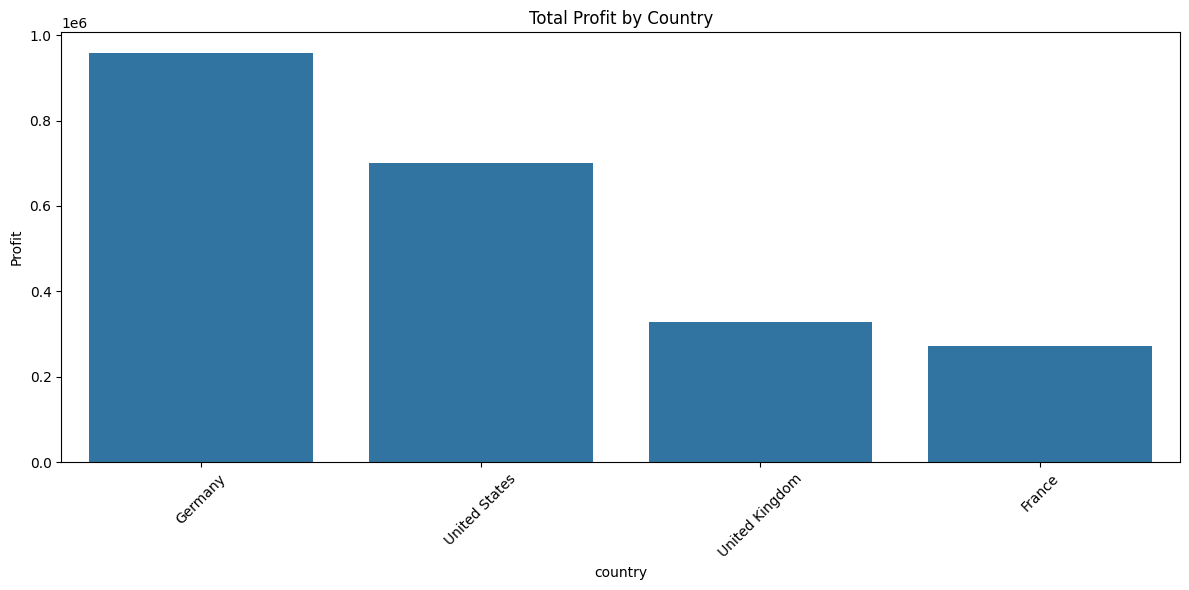

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
country_profit = df.groupby('country')['profit'].sum().sort_values(ascending=False)
sns.barplot(x=country_profit.index, y=country_profit.values)
plt.title("Total Profit by Country")
plt.xticks(rotation=45)
plt.ylabel("Profit")
plt.tight_layout()
plt.show()


<ipython-input-47-6f16c1907ba0>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue = df.set_index('date').resample('M')['revenue'].sum()


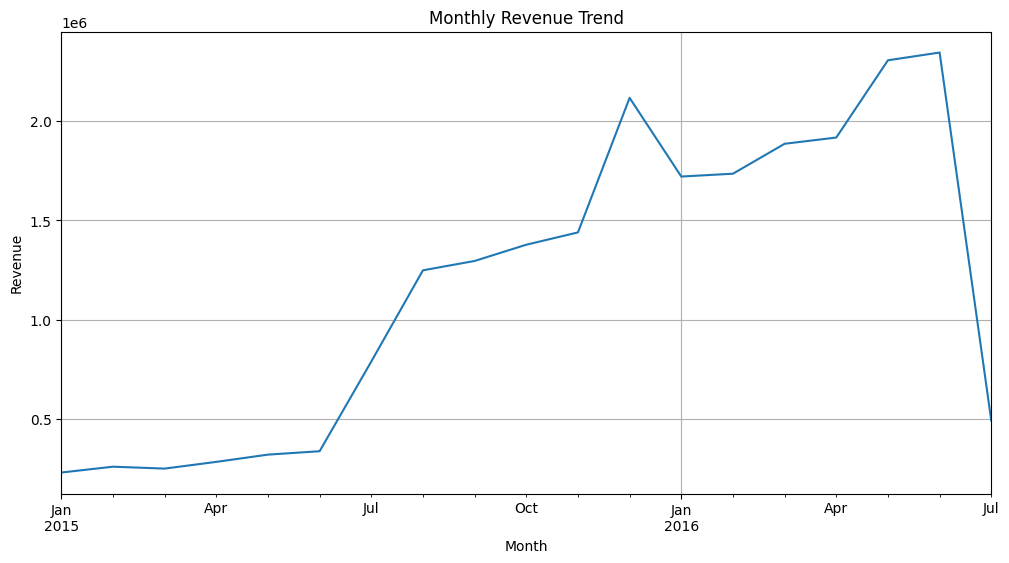

In [47]:
monthly_revenue = df.set_index('date').resample('M')['revenue'].sum()

plt.figure(figsize=(12,6))
monthly_revenue.plot()
plt.title("Monthly Revenue Trend")
plt.ylabel("Revenue")
plt.xlabel("Month")
plt.grid(True)
plt.show()


<ipython-input-48-ccb5ae8fe046>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='product_category', y='revenue', estimator=sum, ci=None)


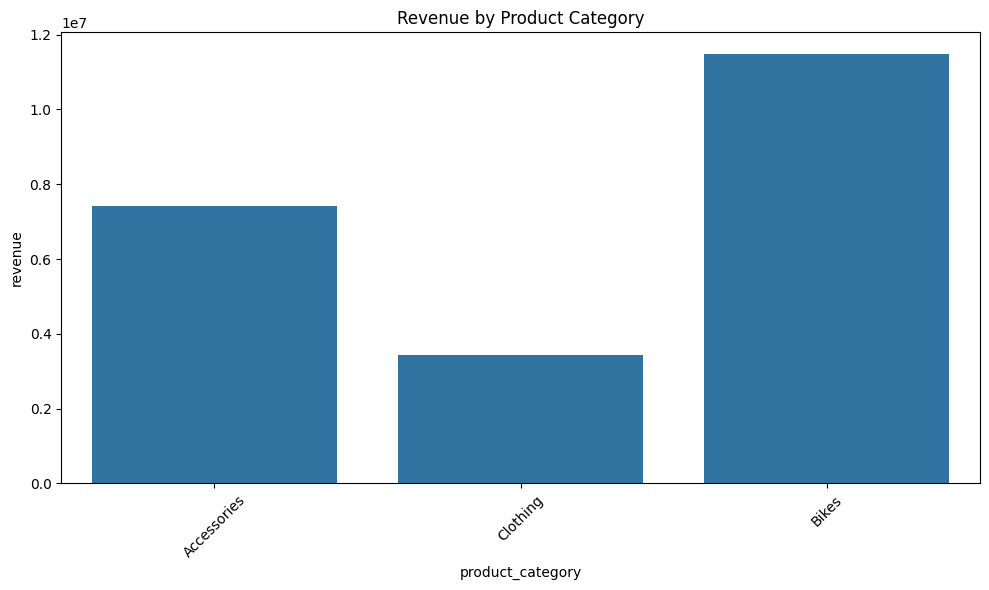

In [48]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='product_category', y='revenue', estimator=sum, ci=None)
plt.title("Revenue by Product Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


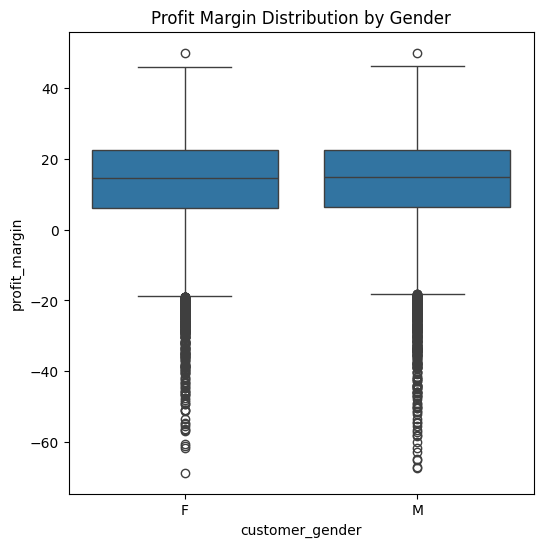

In [49]:
plt.figure(figsize=(6,6))
sns.boxplot(data=df, x='customer_gender', y='profit_margin')
plt.title("Profit Margin Distribution by Gender")
plt.show()


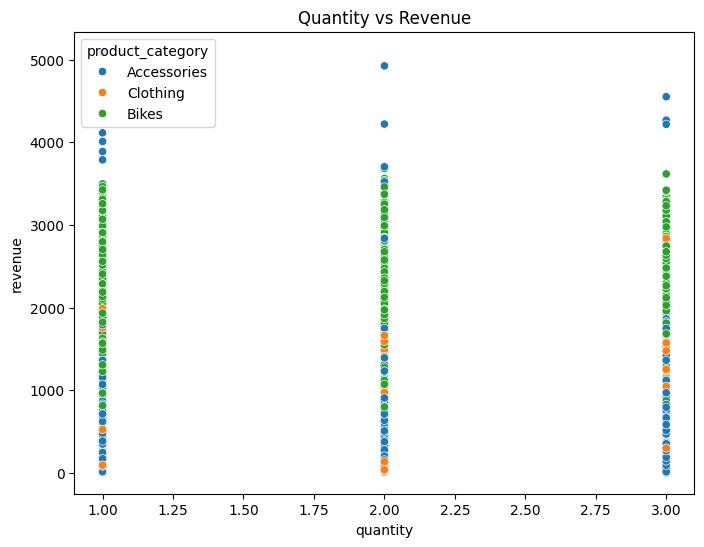

In [50]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='quantity', y='revenue', hue='product_category')
plt.title("Quantity vs Revenue")
plt.show()
